In [1]:
import sys, os
# os.environ['PATH']='/projects/bdne/spandey3/tex/texlive/bin/x86_64-linux:'+ os.environ['PATH']
# os.environ['PYTHONPATH']='/projects/bdne/spandey3/tex/texlive/bin/x86_64-linux:'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION']='.9'
import jax_cosmo.background as bkgrd
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from jax.lib import xla_bridge
platform = xla_bridge.get_backend().platform
import jax
print(jax.local_device_count(), jax.device_count())
jax.config.update('jax_platform_name', platform)
jax.config.update("jax_enable_x64", True)
import jax
# Change the current working directory to the desired path
# os.chdir('/mnt/home/spandey/ceph/GODMAX/src/')

import matplotlib

import matplotlib.pyplot as pl
# set latex to false:
pl.rcParams['text.usetex'] = False
%load_ext autoreload
%autoreload 2
import pathlib
curr_path = pathlib.Path().absolute()
abs_path_data = os.path.abspath(curr_path / "../data/") 
abs_path_src = os.path.abspath(curr_path / "../src/") 
abs_path_results = os.path.abspath(curr_path / "../results/") 
sys.path.append((curr_path))
sys.path.append((abs_path_data))
sys.path.append((abs_path_results))
sys.path.append(abs_path_src)
import numpyro
numpyro.set_platform("gpu")
numpyro.enable_x64()
from jax import config
config.update("jax_enable_x64", True)
import scipy.interpolate as interp
import pickle as pk
import numpy as np
import jax.numpy as jnp
import colossus 
from jax import vmap, grad, pmap
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
# pl.rc('font', family='DejaVu Sans')

%matplotlib inline


/tmp/ipykernel_3127389/1189520648.py:8: DeprecationWarning: jax.lib.xla_bridge.get_backend is deprecated; use jax.extend.backend.get_backend.
  platform = xla_bridge.get_backend().platform


1 1


/projects/bdne/spandey3/envs/charm/lib/python3.10/site-packages/tqdm-4.66.5-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [146]:
# cosmo_params_dict = {'flat': True, 'H0': 70.0, 'Om0': 0.2793, 'Ob0': 0.0463, 'sigma8': 0.821, 'ns': 0.972, 'w0':-1.0}
# cosmo_params_dict = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95, 'w0':-1.0}
cosmo_params_dict = {'flat': True, 'H0': 67.2, 'Om0': 0.29, 'Ob0': 0.049, 'sigma8': 0.783, 'ns': 0.95, 'w0':-1.0}
sim_params_dict = {}
sim_params_dict['nfw_trunc'] = True
sim_params_dict['gamma_rhogas'] = 2.0
sim_params_dict['delta_rhogas'] = 7.0
# sim_params_dict['theta_co'] = 0.01
# sim_params_dict['theta_ej'] = 1.0

sim_params_dict['theta_co_0'] = 0.1
sim_params_dict['log10_Mstar0_theta_co'] = 15.0
sim_params_dict['nu_theta_co_M'] = 0.0
sim_params_dict['nu_theta_co_z'] = 0.0

sim_params_dict['theta_ej_0'] = 1.25
sim_params_dict['log10_Mstar0_theta_ej'] = 15.0
sim_params_dict['nu_theta_ej_M'] = 0.0
sim_params_dict['nu_theta_ej_z'] = 0.0

sim_params_dict['log10_Mc0'] = 14.83
sim_params_dict['log10_Mstar0'] = 14.0
sim_params_dict['mu_beta'] = 0.21
sim_params_dict['nu_z'] = 0.0
sim_params_dict['nu_M'] = 0.0

sim_params_dict['eta_star'] = 0.3
sim_params_dict['eta_cga'] = 0.6


sim_params_dict['neg_bhse_plus_1'] = 0.833
sim_params_dict['A_starcga'] = 0.09
sim_params_dict['log10_M1_starcga'] = 11.4
sim_params_dict['epsilon_rt'] = 4.0


sim_params_dict['a_zeta'] = 0.3
sim_params_dict['n_zeta'] = 2
sim_params_dict['alpha_nt'] = 0.18
sim_params_dict['beta_nt'] = 0.5
sim_params_dict['n_nt'] = 0.3
sim_params_dict['cosmo'] = cosmo_params_dict


halo_params_dict = {}
halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 5e-3, 12, 32
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 1.0, 10
# halo_params_dict['z_array'] = np.array([1e-3, 0.5, 1.0])
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.01, 3.0, 20
halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.01, 3.0, 24
# halo_params_dict['z_array'] = np.array([1e-3])
# halo_params_dict['z_array'] = np.array([0.5])
# halo_params_dict['z_array'] = np.array([1.0])
# halo_params_dict['nz'] = len(halo_params_dict['z_array'])
# halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 12.0, 15.5, 20
halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 11.5, 15.5, 32
# halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 2, 9, 16

lmin = 1.0
lmax = 60000.0
fac = 1
dl_log_array = 0.23025851 / fac
# dl_log_array = 0.1
l_array_all = np.exp(np.arange(np.log(lmin), np.log(lmax), dl_log_array))
dl_array = l_array_all[1:] - l_array_all[:-1]
l_array_survey = (l_array_all[1:] + l_array_all[:-1]) / 2.
halo_params_dict['ell_array'] = jnp.array(l_array_survey)
halo_params_dict['nell'] = len(l_array_survey)
halo_params_dict['ellmin'] = l_array_survey[0]
halo_params_dict['ellmax'] = l_array_survey[-1]
# halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**14, 32
# try:
halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.05
halo_params_dict['mdef'] = '200c'
halo_params_dict['hmf_model'] = 'T10'
# halo_params_dict['conc_model'] = 'Diemer15'
halo_params_dict['conc_model'] = 'Duffy08'
halo_params_dict['do_corr_2h_mm'] = True

# halo_params_dict['do_corr_2h_mm'] = False

from astropy.io import fits
df = fits.open(os.path.abspath(abs_path_data + '/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'))
# df = fits.open('data/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits') 
z_array = df['nz_source'].data['Z_MID']
nz_info_dict = {}
nz_info_dict['z_array'] = z_array
nz_info_dict['nbins'] = 4
nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-4)
nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-4)
nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-4)
nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-4)
# nz_info_dict['nz4'] = np.maximum(df['nz_source'].data['BIN5'], 1e-4)
analysis_dict = {}
analysis_dict['nz_info_dict'] = nz_info_dict
analysis_dict['do_sheary'] = True
analysis_dict['do_shear2pt'] = True
analysis_dict['do_yy'] = True

analysis_dict['fsky_yy'] = 0.1
analysis_dict['fsky_ky'] = 0.1
analysis_dict['fsky_kk'] = 0.1
analysis_dict['fac_ell_hres'] = fac

# df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits')
# df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits')
theta_data = df['xip'].data['ANG'][0:20]

# analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 16384
analysis_dict['angles_data_array'] = jnp.array(theta_data)
analysis_dict['beam_fwhm_arcmin'] = 1.6
analysis_dict['want_like_diff'] = True
analysis_dict['calc_nfw_only'] = False
analysis_dict['conc_dep_model'] = False


analysis_dict['get_cov'] = False
# analysis_dict['stats_for_cov'] = ['ky']
analysis_dict['stats_for_cov'] = ['ky', 'kk']
analysis_dict['analysis_coords'] = 'real'
# l_array_survey = np.logspace(np.log10(lmin), np.log10(lmax), int((lmax-lmin)/dl_log_array)+1)
analysis_dict['l_array_survey'] = jnp.array(l_array_survey)
analysis_dict['dl_array_survey'] = jnp.array(dl_array)
# analysis_dict['yy_total_ell_fname'] = '/Users/shivam/Downloads/ACT_Cls/Cls_ilc_SZ_deproj_cib_cibdBeta_1.7_10.7_yy_apod10arcmin_21Mar24.txt'
# analysis_dict['yy_total_ell_fname'] = '/Users/shivam/Downloads/ACT_Cls/Cls_ilc_SZ_yy_apod10arcmin_21Mar24.txt'
analysis_dict['yy_total_ell_fname'] = os.path.abspath(abs_path_data + '/DESxACT/ACT_Cls/Cls_ilc_SZ_yy_apod10arcmin_21Mar24.txt')
# analysis_dict['sigma_epsilon_SN_bins'] = [0.2724, 0.2724, 0.2724, 0.2724]
# analysis_dict['neff_arcmin2_SN_bins'] = [1.7971, 1.5521, 1.5967, 1.0979]

analysis_dict['sigma_epsilon_SN_bins'] = [0.243, 0.262, 0.259, 0.301]
analysis_dict['neff_arcmin2_SN_bins'] = [1.476, 1.479, 1.484, 1.461]

other_params_dict = {}
other_params_dict['A_IA'] = 0.0
other_params_dict['eta_IA'] = 0.0
other_params_dict['z0_IA'] = 0.62
other_params_dict['C1_rhocrit'] = 0.0134
other_params_dict['Delta_z_bias_array'] = np.zeros(nz_info_dict['nbins'])
other_params_dict['mult_shear_bias_array'] = np.zeros(nz_info_dict['nbins'])






In [147]:
from setup_power_spectra import setup_power_BCMP

setup_power_BCMP_test = setup_power_BCMP(sim_params_dict, halo_params_dict, analysis_dict, num_points_trapz_int=64, verbose_time=True)






Time taken to calculate BCMP profile:  5.342336893081665  seconds
Time taken to setup Pk:  1.8196525573730469
Time taken to setup HMF:  4.533313512802124


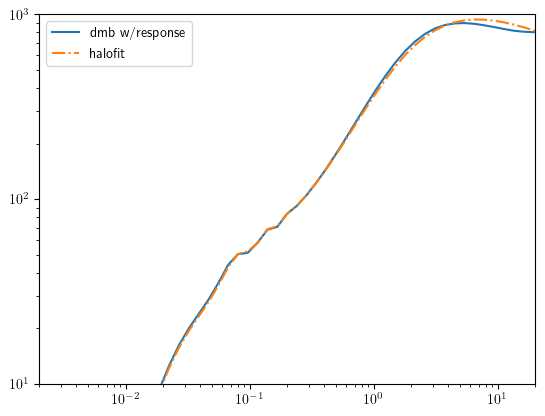

In [148]:
# setup_power_BCMP_test.Pmm_tot_kz_mat.shape
pl.figure()
kval = setup_power_BCMP_test.kPk_array
pl.plot(setup_power_BCMP_test.kPk_array, (kval**2)*setup_power_BCMP_test.Pmm_tot_kz_mat[:,0], label='dmb w/response')
pl.plot(setup_power_BCMP_test.kPk_array, (kval**2)*setup_power_BCMP_test.phfit_kz_mat[:,0], ls='-.', label='halofit')
# pl.plot(setup_power_BCMP_test.kPk_array, (kval**2)*setup_power_BCMP_test.Pmm_dmb_tot_mat[:,0], label='dmb w/o response')
# pl.plot(setup_power_BCMP_test.kPk_array, (kval**2)*setup_power_BCMP_test.Pmm_nfw_tot_mat[:,0], ls='--', label='nfw')
pl.xscale('log')
pl.yscale('log')
pl.legend()
pl.xlim(2e-3, 20)
pl.ylim(10, 1e3)
pl.show()




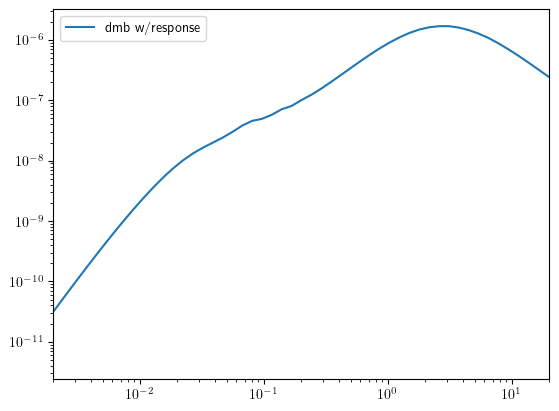

In [149]:
# setup_power_BCMP_test.Pmm_tot_kz_mat.shape
pl.figure()
kval = setup_power_BCMP_test.kPk_array
pl.plot(setup_power_BCMP_test.kPk_array, (kval**2)*setup_power_BCMP_test.Pym_tot_kz_mat[:,0], label='dmb w/response')
# pl.plot(setup_power_BCMP_test.kPk_array, (kval**2)*setup_power_BCMP_test.phfit_kz_mat[:,0], ls='-.', label='halofit')
# pl.plot(setup_power_BCMP_test.kPk_array, (kval**2)*setup_power_BCMP_test.Pmm_dmb_tot_mat[:,0], label='dmb w/o response')
# pl.plot(setup_power_BCMP_test.kPk_array, (kval**2)*setup_power_BCMP_test.Pmm_nfw_tot_mat[:,0], ls='--', label='nfw')
pl.xscale('log')
pl.yscale('log')
pl.legend()
pl.xlim(2e-3, 20)
# pl.ylim(10, 1e3)
pl.show()




In [150]:
from get_power_spectra import get_power_BCMP

get_power_BCMP_test = get_power_BCMP(sim_params_dict, halo_params_dict, analysis_dict, other_params_dict, num_points_trapz_int=64, verbose_time=True)






Time taken to calculate BCMP profile:  4.294307470321655  seconds
Time taken to setup Pk:  1.8308343887329102
Time taken to setup HMF:  4.48272180557251
Time for setup_power_BCMP:  20.497591257095337
Time for computing Wk_mat:  0.34095120429992676
Time for computing nla_mat:  0.1644299030303955
Time for computing Cl_kappa_y_tot_mat:  0.08416247367858887
Time for computing Cl_kappa_kappa_2h_mat:  0.11010527610778809


In [151]:
# get_power_BCMP_test.Cl_kappa_y_1h_mat.shape


In [152]:
# get_power_BCMP_test.Cl_kappa_y_1h_mat

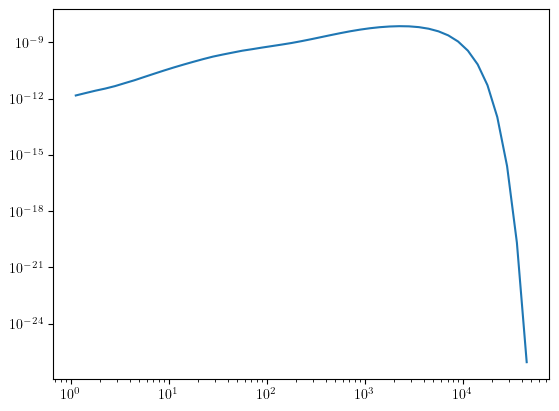

In [153]:
ell = get_power_BCMP_test.ell_array
pl.figure()
pl.plot(get_power_BCMP_test.ell_array, (1/(2*np.pi))*(ell)*(ell+1)*get_power_BCMP_test.Cl_kappa_y_tot_mat[3,:])
pl.xscale('log')
pl.yscale('log')
pl.show()


In [154]:
# # from get_corr_func import get_corrfunc_BCMP
# import copy
# from tqdm import tqdm
# # from get_corr_func_jit import get_corrfunc_BCMP
# from get_corr_func import get_corrfunc_BCMP
# sims_params_dict_vary = copy.deepcopy(sim_params_dict)
# theta_ej_array = np.array([1.5,2.0,2.5])
# analysis_dict_vary = copy.deepcopy(analysis_dict)
# fac_th = 1
# gty_out_all = np.zeros((len(theta_ej_array), fac_th * len(theta_data)))
# xip_out_all = np.zeros((len(theta_ej_array), fac_th * len(theta_data)))
# xim_out_all = np.zeros((len(theta_ej_array), fac_th * len(theta_data)))
# for jt in tqdm(range(len(theta_ej_array))):
#     sims_params_dict_vary['theta_ej_0'] = theta_ej_array[jt]
#     analysis_dict_vary['angles_data_array'] = jnp.logspace(np.log10(0.5), np.log10(100), fac_th * len(theta_data))
#     get_corrfunc_BCMP_test = get_corrfunc_BCMP(sims_params_dict_vary, halo_params_dict, analysis_dict_vary, other_params_dict, verbose_time=False)
#     gty_out_all[jt,:] = get_corrfunc_BCMP_test.gty_out_mat[:,3]
#     xip_out_all[jt,:] = get_corrfunc_BCMP_test.xip_out_mat[:,3,3]
#     xim_out_all[jt,:] = get_corrfunc_BCMP_test.xim_out_mat[:,3,3]
    





In [155]:
# import scipy.interpolate as interp
# import pickle as pk
# jt_dv = 1
# # cov_total = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/forecast/total_cov_gty_xip_xim_Y1.pk', 'rb'))['cov_total']
# df_measure = pk.load(open(abs_path_data + '/DESxACT/DESxACT_gty_xip_xim_DV_ilc_SZ_yy.pk', 'rb'))
# cov_total = df_measure['cov_total']
# cov_gty = cov_total[0:80,0:80]
# # C = jnp.array(df_data['COVMAT'].data[400:,400:])
# # data_vec = jnp.array(df_data['compton_shear'].data['VALUE'])
# # gty_data_to_plot = data_vec[60:]
# # gty_interp = interp.interp1d(analysis_dict_vary['angles_data_array'], gty_out_all[jt_dv,:], fill_value='extrapolate')
# # gty_data_to_plot = gty_interp(theta_data)
# gty_data_to_plot = df_measure['xi_all'][60:80]
# gty_sig_to_plot = jnp.sqrt(jnp.diag(cov_gty))[60:80]

# C = cov_total[80:280,80:280]
# bin1, bin2 = df_measure['bin1_all'][80:280], df_measure['bin2_all'][80:280]
# indsel = np.where((bin1==4) & (bin2==4))[0]
# # xip_data_to_plot = data_vec[indsel]
# # xip_interp = interp.interp1d(analysis_dict_vary['angles_data_array'], xip_out_all[jt_dv,:], fill_value='extrapolate')
# # xip_data_to_plot = xip_interp(theta_data)
# xip_data_to_plot = df_measure['xi_all'][80:280][indsel]
# xip_sig_to_plot = jnp.sqrt(jnp.diag(C))[indsel]

# C = cov_total[280:480,280:480]
# # data_vec = jnp.array(df_data['xim'].data['VALUE'])
# bin1, bin2 = df_measure['bin1_all'][280:480], df_measure['bin2_all'][280:480]
# # bin1, bin2 = df_data['xim'].data['BIN1'], df_data['xim'].data['BIN2']
# indsel = np.where((bin1==4) & (bin2==4))[0]
# # xim_data_to_plot = data_vec[indsel]
# # xim_interp = interp.interp1d(analysis_dict_vary['angles_data_array'], xim_out_all[jt_dv,:], fill_value='extrapolate')
# # xim_data_to_plot = xim_interp(theta_data)
# xim_data_to_plot = df_measure['xi_all'][280:480][indsel]
# xim_sig_to_plot = jnp.sqrt(jnp.diag(C))[indsel]







In [156]:
# sim_params_dict['gamma_rhogas'] = 2.0
# sim_params_dict['delta_rhogas'] = 7.0
# # sim_params_dict['theta_co'] = 0.01
# # sim_params_dict['theta_ej'] = 1.0

# sim_params_dict['theta_co_0'] = 0.1
# sim_params_dict['log10_Mstar0_theta_co'] = 15.0
# sim_params_dict['nu_theta_co_M'] = 0.0
# sim_params_dict['nu_theta_co_z'] = 0.0

# sim_params_dict['theta_ej_0'] = 1.25
# sim_params_dict['log10_Mstar0_theta_ej'] = 15.0
# sim_params_dict['nu_theta_ej_M'] = 0.0
# sim_params_dict['nu_theta_ej_z'] = 0.0

# sim_params_dict['log10_Mc0'] = 14.83
# sim_params_dict['log10_Mstar0'] = 14.0
# sim_params_dict['mu_beta'] = 0.21
# sim_params_dict['nu_z'] = 0.0
# sim_params_dict['nu_M'] = 0.0



In [157]:
import copy
from tqdm import tqdm
# from get_corr_func_jit import get_corrfunc_BCMP
from get_corr_func import get_corrfunc_BCMP
# sim_params_dict['nu_theta_ej_M'] = -0.1
sims_params_dict_vary = copy.deepcopy(sim_params_dict)
sims_params_dict_vary['theta_ej_0'] = 1.6
sims_params_dict_vary['nu_theta_ej_M'] = -0.3
sims_params_dict_vary['nu_theta_ej_z'] = 0.5
sims_params_dict_vary['gamma_rhogas'] = 1.8
sims_params_dict_vary['delta_rhogas'] = 5.5
sims_params_dict_vary['theta_co_0'] = 0.01

get_corrfunc_BCMP_test = get_corrfunc_BCMP(sims_params_dict_vary, halo_params_dict, analysis_dict, other_params_dict, verbose_time=False)




In [169]:
deproj = 'cib_1p7_dBeta'
# deproj = 'None'
# deproj = 'cib_1p7'
probe = 'all'

if deproj == 'None':
    true_y_file = 'ilc_SZ_yy'
if deproj == 'cib_1p0':
    true_y_file = 'ilc_SZ_deproj_cib_1.0_10.7_yy'
if deproj == 'cib_1p2':
    true_y_file = 'ilc_SZ_deproj_cib_1.2_10.7_yy'        
if deproj == 'cib_1p4':
    true_y_file = 'ilc_SZ_deproj_cib_1.4_10.7_yy'        
if deproj == 'cib_1p6':
    true_y_file = 'ilc_SZ_deproj_cib_1.6_10.7_yy'  
if deproj == 'cib_1p7':
    true_y_file = 'ilc_SZ_deproj_cib_1.7_10.7_yy'                                      
if deproj == 'cib_1p8':
    true_y_file = 'ilc_SZ_deproj_cib_1.8_10.7_yy'        
if deproj == 'cib_2p0':
    true_y_file = 'ilc_SZ_deproj_cib_2.0_10.7_yy'                
if deproj == 'cib_1p0_dBeta':
    true_y_file = 'ilc_SZ_deproj_cib_cibdBeta_1.0_10.7_yy'        
if deproj == 'cib_1p2_dBeta':
    true_y_file = 'ilc_SZ_deproj_cib_cibdBeta_1.2_10.7_yy'
if deproj == 'cib_1p4_dBeta':
    true_y_file = 'ilc_SZ_deproj_cib_cibdBeta_1.4_10.7_yy'
if deproj == 'cib_1p6_dBeta':
    true_y_file = 'ilc_SZ_deproj_cib_cibdBeta_1.6_10.7_yy' 
if deproj == 'cib_1p7_dBeta':
    true_y_file = 'ilc_SZ_deproj_cib_cibdBeta_1.7_10.7_yy'  
if deproj == 'cib_1p8_dBeta':
    true_y_file = 'ilc_SZ_deproj_cib_cibdBeta_1.8_10.7_yy'         
if deproj == 'cib_2p0_dBeta':
    true_y_file = 'ilc_SZ_deproj_cib_cibdBeta_2.0_10.7_yy' 

save_DV_dir = os.path.abspath(abs_path_data + '/DESxACT/DV/')
# df_measure = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/DESxACT/DESxACT_gty_xip_xim_DV_ilc_SZ_yy.pk', 'rb'))
df_measure = pk.load(open(f'{save_DV_dir}/DESxACT_gty_xip_xim_DV_{true_y_file}.pk', 'rb'))
cov_total = df_measure['cov_total']
xi_all = df_measure['xi_all']
theta_all = df_measure['theta_all']
cov_total = jnp.array(cov_total)
data_vec = jnp.array(xi_all)

if probe == 'xip_xim':
    cov_total = cov_total[80:, 80:]
    data_vec = data_vec[80:]
elif probe == 'gty':
    cov_total = cov_total[:80, :80]
    data_vec = data_vec[:80]



In [170]:


# scale cuts:
# remove scales below 10arcmin for first two bins:
indrm1 = np.where(theta_all[:20] < 10.0)[0]
indrm2 = np.where(theta_all[20:40] < 10.0)[0]
indrm = np.concatenate([indrm1, indrm2 + 20])
indrm = jnp.array(indrm)

if probe in ['gty', 'all']:
    data_vec = jnp.delete(data_vec, indrm)
    cov_total = jnp.delete(cov_total, indrm, axis=0)
    cov_total = jnp.delete(cov_total, indrm, axis=1)


df_cs = fits.open(os.path.abspath(abs_path_data + '/DESxACT/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'))
bin1_vals =  df_cs['xip'].data['BIN1'][::20]
bin2_vals =  df_cs['xip'].data['BIN2'][::20]
biny_vals = np.array([1,2,3,4])

# index_gty = {}
index_gty = []
for js in range(80):
    # index_gty[js] = [js%20 ,js//20]
    if js not in indrm:
        index_gty.append([js%20 ,js//20])
index_gty = jnp.array(index_gty)
len_ind_gty = len(index_gty)
# index_xip = {}
index_xip = []
for js in range(200):
    binv = js//20
    thetav = js%20
    # index_xip[js] = [thetav ,bin1_vals[binv]-1, bin2_vals[binv]-1]
    index_xip.append([thetav ,bin1_vals[binv]-1, bin2_vals[binv]-1])
index_xip = jnp.array(index_xip)
# index_xim = {}
index_xim = []
for js in range(200):
    binv = js//20
    thetav = js%20
    # index_xim[js] = [thetav ,bin1_vals[binv]-1, bin2_vals[binv]-1]   
    index_xim.append([thetav ,bin1_vals[binv]-1, bin2_vals[binv]-1])
index_xim = jnp.array(index_xim)

def get_gty_from_index(index):
    index_val = index_gty[index]
    return get_corrfunc_BCMP_test.gty_out_mat[index_val[0], index_val[1]]

def get_xip_from_index(index):
    index_val = index_xip[index]
    return get_corrfunc_BCMP_test.xip_out_mat[index_val[0], index_val[1], index_val[2]]

def get_xim_from_index(index):
    index_val = index_xim[index]
    return get_corrfunc_BCMP_test.xim_out_mat[index_val[0], index_val[1], index_val[2]]

gty_val = vmap(get_gty_from_index)(np.arange(len_ind_gty))
xip_val = vmap(get_xip_from_index)(np.arange(200))
xim_val = vmap(get_xim_from_index)(np.arange(200))

if probe == 'xip_xim':
    mu = jnp.concatenate([xip_val, xim_val])
elif probe == 'gty':
    mu = gty_val
else:
    mu = jnp.concatenate([gty_val, xip_val, xim_val])

    

    

In [171]:
print(data_vec.shape, mu.shape)
chi2 = jnp.dot(jnp.dot((data_vec - mu).T, jnp.linalg.inv(cov_total)), (data_vec - mu))
# print(chi2, len(data_vec) - 5, np.sqrt(2/(len(data_vec) - 5)))
print(chi2/(len(data_vec) - 5), np.sqrt(2/(len(data_vec) - 5)))



(468,) (468,)
1.4051490960818922 0.0657240779900775


In [172]:
index_gty = []
for js in range(80):
    index_gty.append([js%20 ,js//20])
index_gty = jnp.array(index_gty)
len_ind_gty = len(index_gty)
# def get_gty_from_index(index):
#     index_val = index_gty[index]
#     return get_corrfunc_BCMP_test.gty_out_mat[index_val[0], index_val[1]]

def get_gty_from_index(index):
    index_val = index_gty[index]
    return get_corrfunc_BCMP_test.gty_out_mat[index_val[0], index_val[1]]

def get_xip_from_index(index):
    index_val = index_xip[index]
    return get_corrfunc_BCMP_test.xip_out_mat[index_val[0], index_val[1], index_val[2]]

def get_xim_from_index(index):
    index_val = index_xim[index]
    return get_corrfunc_BCMP_test.xim_out_mat[index_val[0], index_val[1], index_val[2]]

gty_all = vmap(get_gty_from_index)(np.arange(80))
xip_all = vmap(get_xip_from_index)(np.arange(200))
xim_all = vmap(get_xim_from_index)(np.arange(200))

save_DV_dir = os.path.abspath(abs_path_data + '/DESxACT/DV/')
# df_measure = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/DESxACT/DESxACT_gty_xip_xim_DV_ilc_SZ_yy.pk', 'rb'))
df_measure = pk.load(open(f'{save_DV_dir}/DESxACT_gty_xip_xim_DV_{true_y_file}.pk', 'rb'))
cov_total = df_measure['cov_total']
xi_all = df_measure['xi_all']
theta_all = df_measure['theta_all']
cov_total = jnp.array(cov_total)
data_vec = jnp.array(xi_all)

gty_dv = data_vec[:80]
sig_gty_dv = np.sqrt(np.diag(cov_total))[:80]

xip_dv = data_vec[80:280]
sig_xip_dv = np.sqrt(np.diag(cov_total))[80:280]
bin1_xip_dv = df_cs['xip'].data['BIN1']
bin2_xip_dv = df_cs['xip'].data['BIN2']

xim_dv = data_vec[280:]
sig_xim_dv = np.sqrt(np.diag(cov_total))[280:]
bin1_xim_dv = df_cs['xim'].data['BIN1']
bin2_xim_dv = df_cs['xim'].data['BIN2']


# cov_total = cov_total[80:, 80:]
# data_vec = data_vec[80:]



In [173]:
# def get_gty_from_index(index):
#     index_val = index_gty[index]
#     return get_corrfunc_BCMP_test.gty_out_mat[index_val[0], index_val[1]]

# def get_xip_from_index(index):
#     index_val = index_xip[index]
#     return get_corrfunc_BCMP_test.xip_out_mat[index_val[0], index_val[1], index_val[2]]

# def get_xim_from_index(index):
#     index_val = index_xim[index]
#     return get_corrfunc_BCMP_test.xim_out_mat[index_val[0], index_val[1], index_val[2]]

gty_val = vmap(get_gty_from_index)(np.arange(len_ind_gty))
xip_val = vmap(get_xip_from_index)(np.arange(200))
xim_val = vmap(get_xim_from_index)(np.arange(200))

if probe == 'xip_xim':
    mu = jnp.concatenate([xip_val, xim_val])
elif probe == 'gty':
    mu = gty_val
else:
    mu = jnp.concatenate([gty_val, xip_val, xim_val])

    

    
    

In [174]:
index_gty = []
for js in range(80):
    index_gty.append([js%20 ,js//20])
index_gty = jnp.array(index_gty)
len_ind_gty = len(index_gty)
def get_gty_from_index(index):
    index_val = index_gty[index]
    return get_corrfunc_BCMP_test.gty_out_mat[index_val[0], index_val[1]]

gty_all = vmap(get_gty_from_index)(np.arange(80))
xip_all = vmap(get_xip_from_index)(np.arange(200))
xim_all = vmap(get_xim_from_index)(np.arange(200))

save_DV_dir = os.path.abspath(abs_path_data + '/DESxACT/DV/')
# df_measure = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/DESxACT/DESxACT_gty_xip_xim_DV_ilc_SZ_yy.pk', 'rb'))
df_measure = pk.load(open(f'{save_DV_dir}/DESxACT_gty_xip_xim_DV_{true_y_file}.pk', 'rb'))
cov_total = df_measure['cov_total']
xi_all = df_measure['xi_all']
theta_all = df_measure['theta_all']
cov_total = jnp.array(cov_total)
data_vec = jnp.array(xi_all)

gty_dv = data_vec[:80]
sig_gty_dv = np.sqrt(np.diag(cov_total))[:80]

xip_dv = data_vec[80:280]
sig_xip_dv = np.sqrt(np.diag(cov_total))[80:280]
bin1_xip_dv = df_cs['xip'].data['BIN1']
bin2_xip_dv = df_cs['xip'].data['BIN2']

xim_dv = data_vec[280:]
sig_xim_dv = np.sqrt(np.diag(cov_total))[280:]
bin1_xim_dv = df_cs['xim'].data['BIN1']
bin2_xim_dv = df_cs['xim'].data['BIN2']


# cov_total = cov_total[80:, 80:]
# data_vec = data_vec[80:]





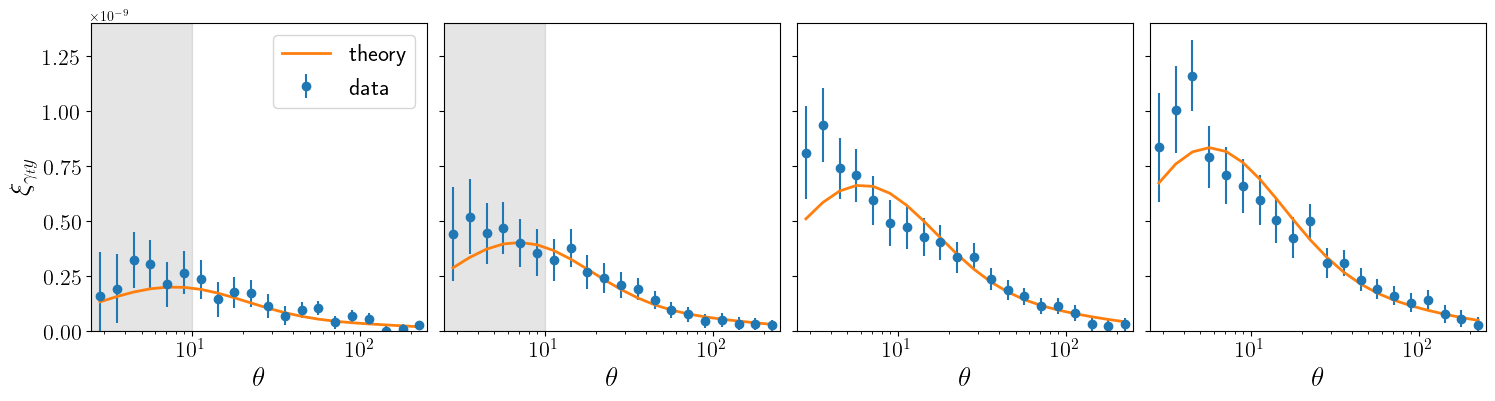

In [175]:
# make a four subplot figure:
fig, axes = pl.subplots(1, 4, figsize=(18, 4), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ji in range(4):
    ax = axes[ji]
    ax.errorbar(theta_all[ji*20:(ji+1)*20], gty_dv[ji*20:(ji+1)*20], sig_gty_dv[ji*20:(ji+1)*20], label='data', ls='', marker='o')
    ax.plot(theta_all[ji*20:(ji+1)*20], gty_all[ji*20:(ji+1)*20], label='theory', lw=2)
    # ax.set_title(f'gty bin {ji+1}')
    if ji == 0:
        ax.legend(fontsize=17)
    ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_ylim(0, 1.4e-9)
    ax.set_xlabel(r'$\theta$', fontsize=20)

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    ax.set_xlim(2.5, 250)
    if ji == 0:
        ax.set_ylabel(r'$\xi_{\gamma_t y}$', fontsize=20)

    if ji < 2:
        ax.axvspan(0, 10, color='gray', alpha=0.2)
    # ax.set_xlim(0, 20)
# fig.savefig('/mnt/home/spandey/ceph/GODMAX/results/ACTxDES/gty_dv.png', bbox_inches='tight', dpi=300)
pl.show()



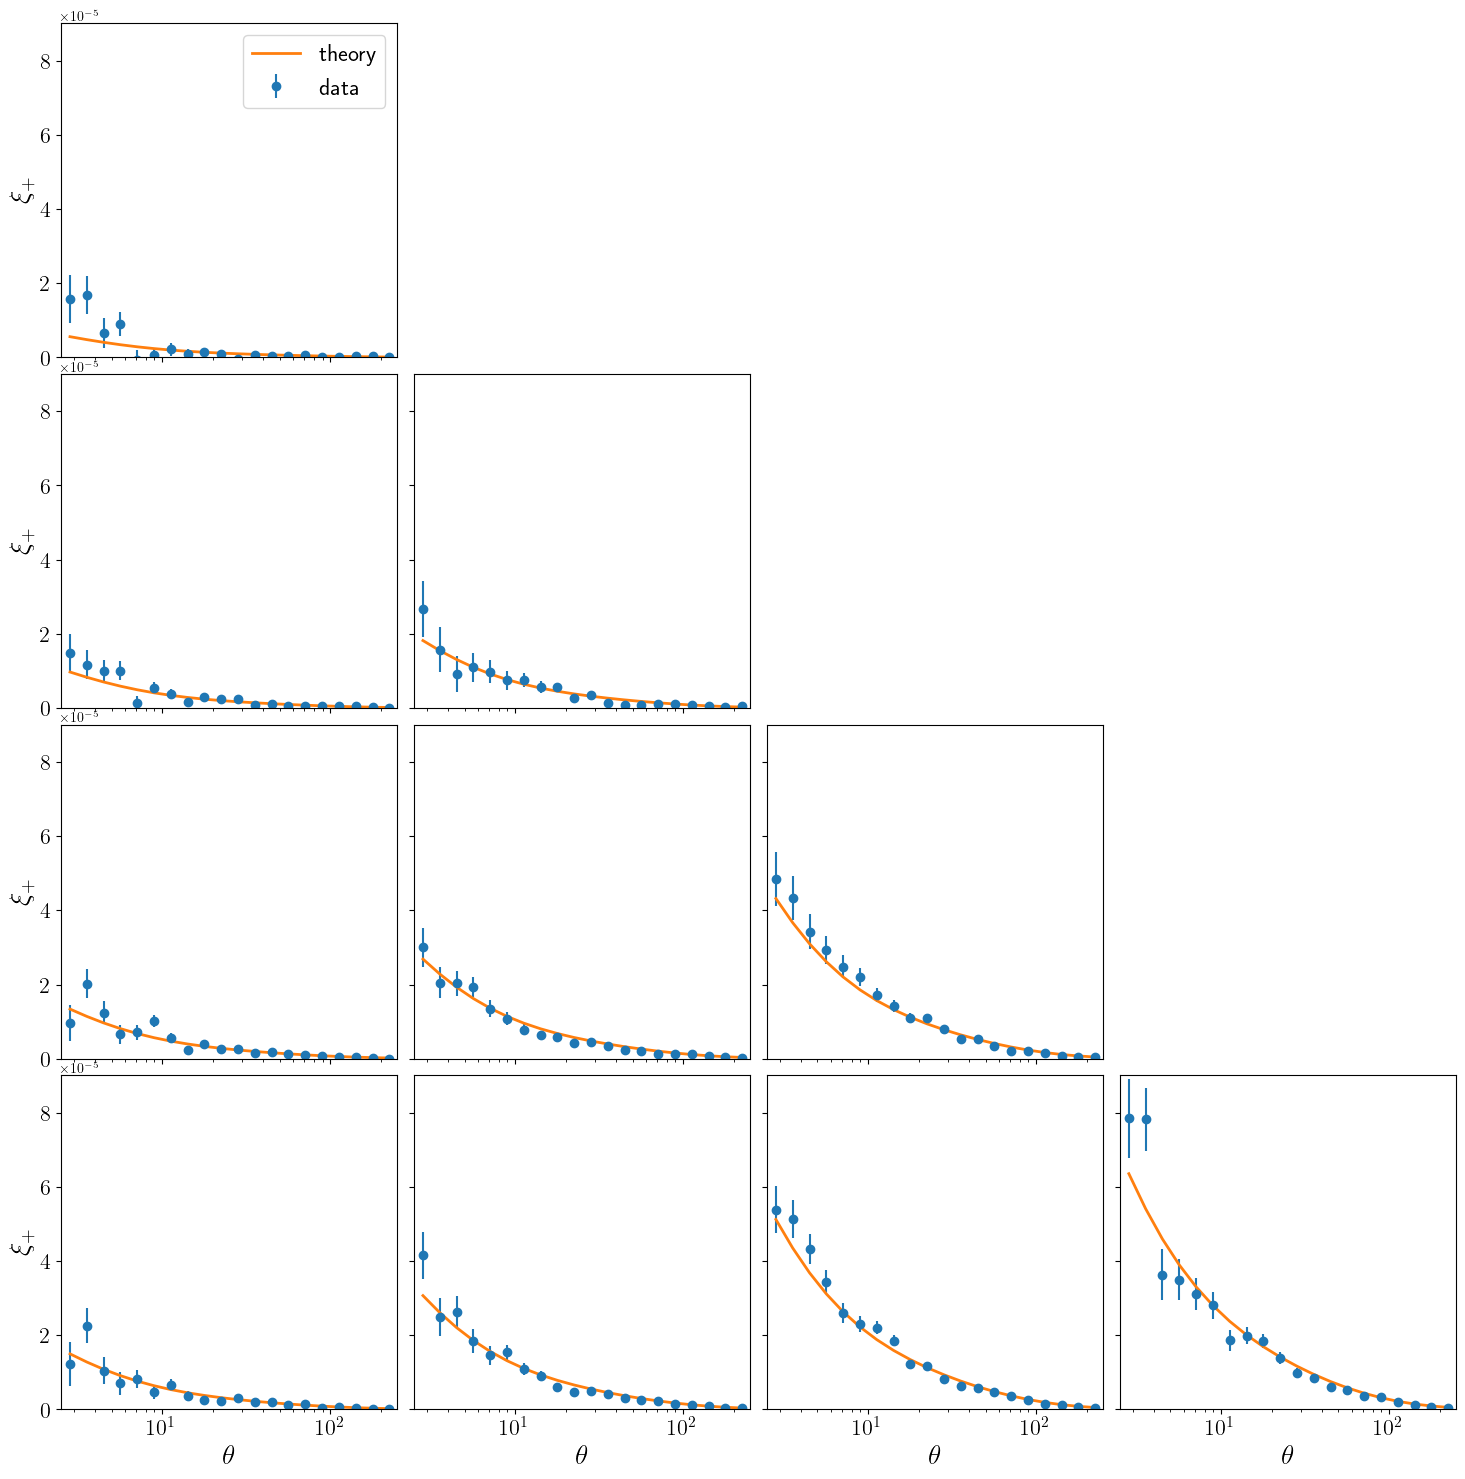

In [176]:
# make a four subplot figure:
theta_xip = theta_all[80:280]
theta_xim = theta_all[280:]
fig, axes = pl.subplots(4, 4, figsize=(18, 18), sharex=True, sharey=True)
# set spacing between suplots:
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ji1 in range(4):
    for ji2 in range(4):
        if ji1 <= ji2:
            ax = axes[ji2, ji1]
            indsel = np.where((bin1_xip_dv == ji1+1) & (bin2_xip_dv == ji2+1))[0]
            ax.errorbar(theta_xip[indsel], xip_dv[indsel], sig_xip_dv[indsel], label='data', ls='', marker='o')
            ax.plot(theta_xip[indsel], xip_all[indsel], label='theory', lw=2)
            # ax.set_title(f'gty bin {ji+1}')
            if ji1 == 0 and ji2 == 0:
                # ax.set_title('xim')
                ax.legend(fontsize=17)
            ax.set_xscale('log')
            # ax.set_yscale('log')
            ax.set_ylim(0, 9e-5)
            ax.set_xlim(2.5, 250)
            if ji2 == 3:
                ax.set_xlabel(r'$\theta$', fontsize=20)
            if ji1 == 0:
                ax.set_ylabel(r'$\xi_{+}$', fontsize=20)
            ax.tick_params(axis='both', which='major', labelsize=16)
            ax.tick_params(axis='both', which='minor', labelsize=16)

            # if ji < 2:
                # ax.axvspan(0, 10, color='gray', alpha=0.2)
        else:
            # delete the subplot:
            fig.delaxes(axes[ji2, ji1])
    # ax.set_xlim(0, 20)
# fig.savefig('/mnt/home/spandey/ceph/GODMAX/results/ACTxDES/xip_dv.png', bbox_inches='tight', dpi=300)
pl.show()




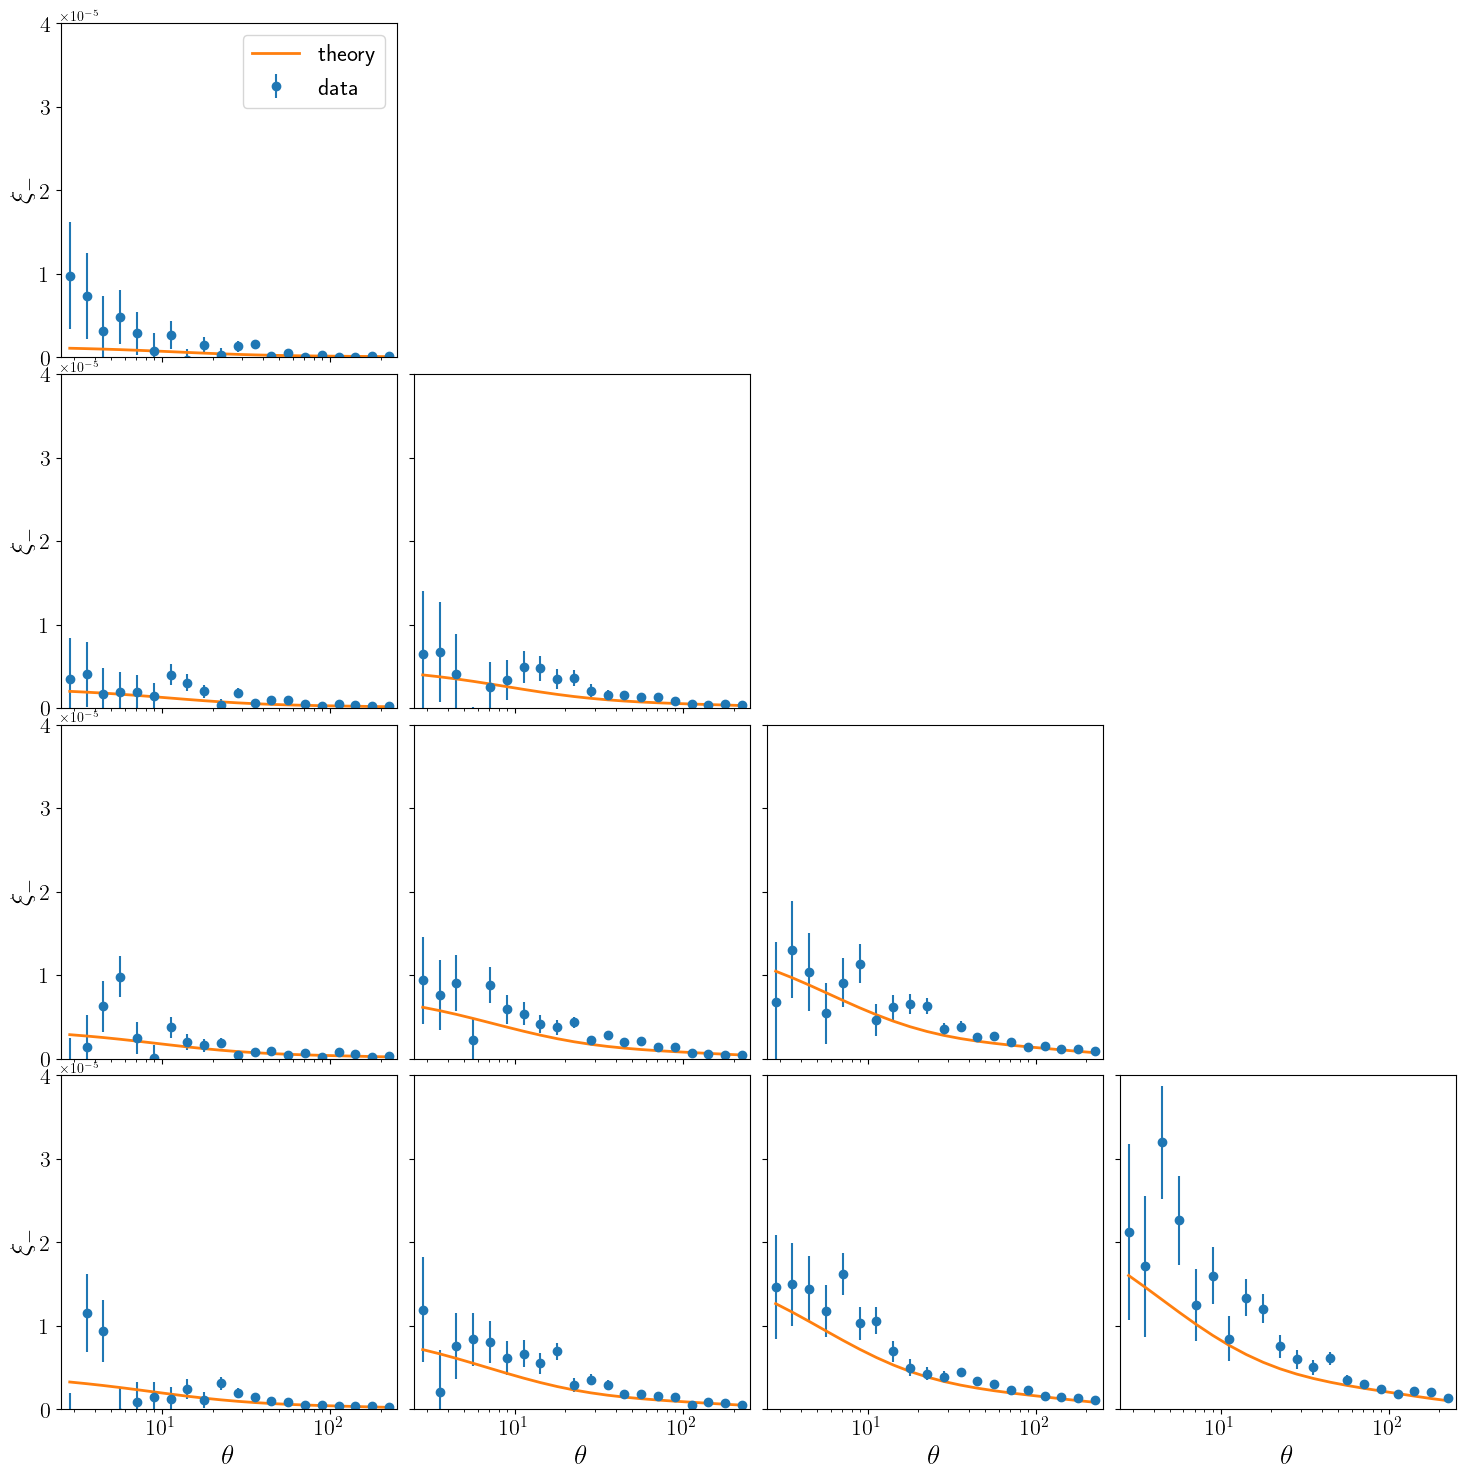

In [177]:
# make a four subplot figure:
theta_xip = theta_all[80:280]
theta_xim = theta_all[280:]
fig, axes = pl.subplots(4, 4, figsize=(18, 18), sharex=True, sharey=True)
# set spacing between suplots:
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ji1 in range(4):
    for ji2 in range(4):
        if ji1 <= ji2:
            ax = axes[ji2, ji1]
            indsel = np.where((bin1_xim_dv == ji1+1) & (bin2_xim_dv == ji2+1))[0]
            ax.errorbar(theta_xim[indsel], xim_dv[indsel], sig_xim_dv[indsel], label='data', ls='', marker='o')
            ax.plot(theta_xim[indsel], xim_all[indsel], label='theory', lw=2)
            # ax.set_title(f'gty bin {ji+1}')
            if ji1 == 0 and ji2 == 0:
                # ax.set_title('xim')
                ax.legend(fontsize=17)
            ax.set_xscale('log')
            # ax.set_yscale('log')
            ax.set_ylim(0, 4e-5)
            ax.set_xlim(2.5, 250)
            if ji2 == 3:
                ax.set_xlabel(r'$\theta$', fontsize=20)
            if ji1 == 0:
                ax.set_ylabel(r'$\xi_{-}$', fontsize=20)
            ax.tick_params(axis='both', which='major', labelsize=16)
            ax.tick_params(axis='both', which='minor', labelsize=16)

            # if ji < 2:
                # ax.axvspan(0, 10, color='gray', alpha=0.2)
        else:
            # delete the subplot:
            fig.delaxes(axes[ji2, ji1])
    # ax.set_xlim(0, 20)
pl.show()
# fig.savefig('/mnt/home/spandey/ceph/GODMAX/results/ACTxDES/xim_dv.png', bbox_inches='tight', dpi=300)



In [178]:
h = sims_params_dict_vary['cosmo']['H0'] / 100.0
Ob = sims_params_dict_vary['cosmo']['Ob0']
Om = sims_params_dict_vary['cosmo']['Om0']
import astropy.units as u
from astropy import constants as const
import jax_cosmo.background as bkgrd
import scipy.integrate as integrate
# from setup_power_spectra_jit import setup_power_BCMP
sigmat = const.sigma_T
m_e = const.m_e
c = const.c
coeff = sigmat / (m_e * (c ** 2))
oneMpc_h_to_cm = (((10 ** 6)/h) * (u.pc).to(u.cm))
const_coeff = ((coeff).to(((u.kpc ** 2) / u.keV))).value


import copy
from tqdm import tqdm
from get_BCMP_profile import BCM_18_wP

BCMP_test = BCM_18_wP(sims_params_dict_vary, halo_params_dict, verbose_time=False)

from scipy.interpolate import interp1d
import jax_cosmo.background as bkgrd
z_array = BCMP_test.z_array
scale_fac_a_array = 1.0 / (1.0 + z_array)
indz = 0
Ez = np.sqrt(bkgrd.growth_factor(BCMP_test.cosmo_jax, scale_fac_a_array))[indz]
# M200_noh = M_array[indM]/h
h70 = h/0.7
M_array = BCMP_test.M_array
Y_model_all = np.zeros(len(M_array))
Y_ss_all = np.zeros(len(M_array))
for jM in range(len(M_array)):
    Mj = M_array[jM]
    M200_noh = Mj/h
    Y_ss = 97.6 * (1/h70) * (Ez**(2/3.)) * (M200_noh/(1e15/h70))**(5/3.) * (Ob/0.043) * (0.25/Om)

    r200_jM = BCMP_test.r200c_mat[jM, indz]
    r_array_jM = np.logspace(-2, np.log10(r200_jM), 100)
    Pe_jz_jM = BCMP_test.Pe_mat_physical[:, indz, jM]
    interpPe = interp1d(np.log(BCMP_test.r_array), np.log(Pe_jz_jM), fill_value='extrapolate')
    Pe_jM = np.exp(interpPe(np.log(r_array_jM)))
    Y_jM = np.trapz(4 * np.pi * r_array_jM**2 * Pe_jM, r_array_jM)

    Y_model_all[jM] = const_coeff * Y_jM * (oneMpc_h_to_cm**3)
    Y_ss_all[jM] = Y_ss




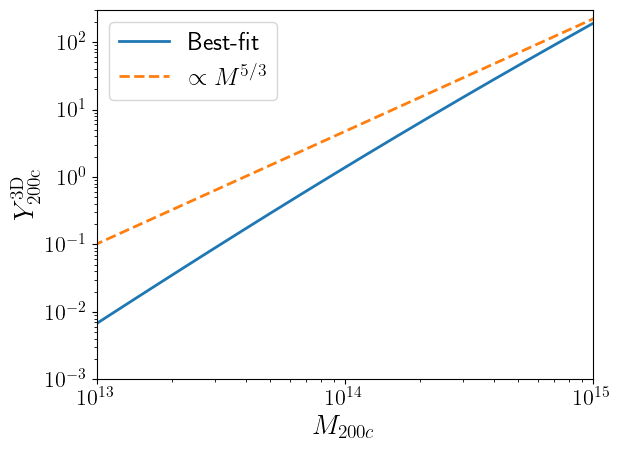

In [179]:
pl.figure()
pl.plot(M_array, Y_model_all, label='Best-fit', lw=2.0)
pl.plot(M_array, 2.2e-23 * (M_array**(5/3.)), label=r'$\propto M^{5/3}$', lw=2.0, ls='--')
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$M_{200c}$', fontsize=20)
pl.ylabel(r'$Y^{\rm 3D}_{\rm 200c}$', fontsize=20)
pl.xlim(1e11, 1e16)
pl.legend(fontsize=18)
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)
pl.xlim(1e13, 1e15)
pl.ylim(1e-3, 300)
pl.show()
# pl.savefig('/mnt/home/spandey/ceph/GODMAX/results/ACTxDES/Y_M_bestfit.png', bbox_inches='tight', dpi=300)





/tmp/ipykernel_2857650/1647961835.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 3/3 [00:00<00:00, 1855.34it/s]


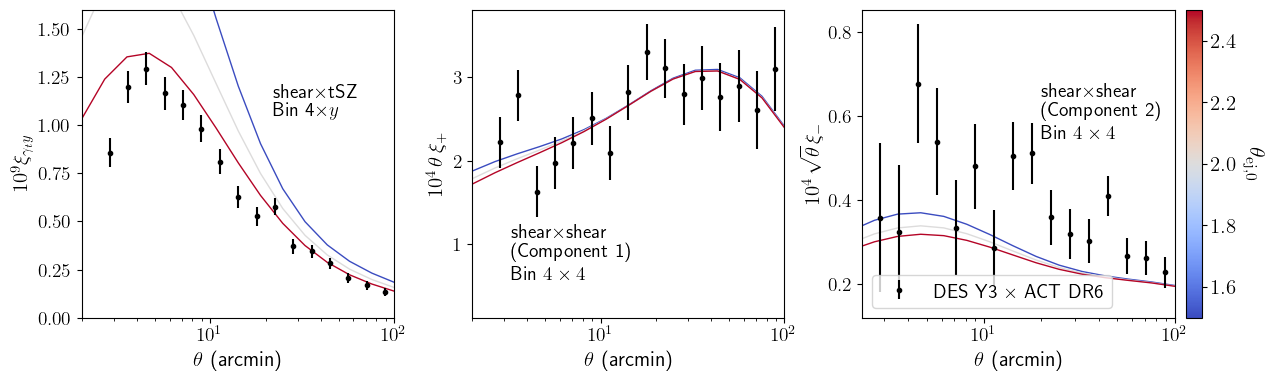

In [48]:
pl.rc('text', usetex=True)
# make a three panel plot, plotting all the theta_ej curves for for gty_out_thetaej[:,3,:], xip_out_thetaej[:,3,3,:], xim_out_thetaej[:,3,3,:]
# draw theta_ej curves from a colormap
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(theta_ej_array).min(), vmax=(theta_ej_array).max())
# analysis_dict_vary['angles_data_array'] = jnp.logspace(np.log10(0.5), np.log10(100), fac_th * len(theta_data))

pl.figure(figsize=(15,4))
# increase the distance between subplots:
pl.subplots_adjust(wspace=0.25)
pl.subplot(131)
for jM in tqdm(range(len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    pl.plot(analysis_dict_vary['angles_data_array'], 1e9*gty_out_all[jM,:], color=color, alpha=1.0,lw=1.0)
# pl.legend()
pl.errorbar(analysis_dict['angles_data_array'], 1e9*gty_data_to_plot, yerr=1e9*gty_sig_to_plot, fmt='o', color='k',label='data', ms=3.05)
pl.text(22, 1.05, r'shear$\times$tSZ' + '\n' + r'Bin 4$\times y$', fontsize=14)
pl.xscale('log')
pl.xlim(2.0,100)
pl.ylim(0.0,1.6)
pl.ylabel(r'$10^9 \xi_{\gamma_t y}$', fontsize=15)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
# set tick label sizes:
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
# pl.title('1-halo term')
pl.subplot(132)
for jM in tqdm(range(len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    # pl.plot(analysis_dict_vary['angles_data_array'], 1e4*xip_out_all[jM,:], color=color, alpha=1.0,lw=1.0)
    pl.plot(analysis_dict_vary['angles_data_array'], 1e4*xip_out_all[jM,:]*analysis_dict_vary['angles_data_array'], color=color, alpha=1.0,lw=1.0)    
# pl.errorbar(analysis_dict['angles_data_array'], 1e4*xip_data_to_plot, yerr=1e4*xip_sig_to_plot, fmt='o', color='k',label='data', ms=3.05)
pl.errorbar(analysis_dict['angles_data_array'], 1e4*xip_data_to_plot*analysis_dict['angles_data_array'], yerr=1e4*xip_sig_to_plot*analysis_dict['angles_data_array'], fmt='o', color='k',label='data', ms=3.05)
# pl.legend()
pl.text(3.25, 0.6, r'shear$\times$shear' + '\n' + '(Component 1)' + '\n' + r'Bin $4 \times 4$', fontsize=14)
pl.xscale('log')
# pl.yscale('log')
pl.xlim(2.0,100)
# pl.ylim(2.4,4.6)
pl.ylabel(r'$10^4 \, \theta \, \xi_+$', fontsize=15)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
# pl.title('2-halo term')
pl.subplot(133)
for jM in tqdm(range(len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    # pl.plot(analysis_dict_vary['angles_data_array'], 1e5*xim_out_all[jM,:], color=color, alpha=1.0,lw=1.0)
    pl.plot(analysis_dict_vary['angles_data_array'], 1e4*xim_out_all[jM,:]*np.sqrt(analysis_dict_vary['angles_data_array']), color=color, alpha=1.0,lw=1.0)    
# pl.errorbar(analysis_dict['angles_data_array'], 1e5*xim_data_to_plot, yerr=1e5*xim_sig_to_plot, fmt='o', color='k', label=r'LSST (Y1)$\times$SO', ms=3.05)
pl.errorbar(analysis_dict['angles_data_array'], 1e4*xim_data_to_plot*np.sqrt(analysis_dict['angles_data_array']), yerr=1e4*xim_sig_to_plot*np.sqrt(analysis_dict['angles_data_array']), fmt='o', color='k', label=r'DES Y3 $\times$ ACT DR6', ms=3.05)
pl.legend(loc='lower left', fontsize=14)
# pl.legend()
pl.xscale('log')
pl.text(20, 0.55, r'shear$\times$shear' + '\n' +'(Component 2)' + '\n' + r'Bin $4 \times 4$', fontsize=14)
# pl.yscale('log')
pl.xlim(2.3,100)
# pl.ylim(0.38,0.6)
pl.ylabel(r'$10^4 \, \sqrt{\theta} \, \xi_-$', fontsize=15)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
# pl.title('2-halo term')
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm, ax=pl.gcf().get_axes(), orientation='vertical', fraction=0.05, pad=0.01)
cbar.set_label(r'$\theta_{\rm ej, 0}$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=15)
# pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/plots/forecast_dv_lssty1_so.pdf', bbox_inches='tight')

pl.show()


